In [1]:
import pickle
import matplotlib.pyplot as plt
import os
os.chdir("./..")
from docker_agent_logger.app.src.AI import *
import pandas as pd

2025-04-24 12:43:02.185277: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-24 12:43:02.757704: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-24 12:43:02.759705: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-24 12:43:03.899775: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Using TensorFlow backend


In [2]:
import matplotlib.colors as mcolors
import matplotlib as mpl
# !sudo apt install texlive-fonts-recommended texlive-fonts-extra cm-super -y
# !sudo apt install dvipng -y

def set_color_map(plt, cm: str) -> bool:
    """
    Sets the colormap for the specified plot:
        - https://matplotlib.org/stable/tutorials/colors/colormaps.html
    """
    # to change default color cycle
    plt.rcParams["image.cmap"] = cm
    colormaps = plt.cm.__dict__
    if cm in colormaps:
        plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colormaps[cm].colors)
        return True
    else:
        return False
    
set_color_map(plt, "Set2")

mpl.rcParams.update(
    {
        "pgf.texsystem": "pdflatex",
        "font.family": "Times New Roman",
        "font.serif": "Computer Modern Roman",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "font.size": 14,
    }
)
use_pgf = True
plt.rcParams["text.usetex"] = True
plt.rcParams["figure.figsize"] = (8,5)

In [22]:
df = pd.read_csv("data/cluster_metrics.txt")
df.cpu = df.cpu.apply(lambda x: x[:-1]).astype(int)*1e-9 #original: nCPU
df.memory = df.memory.apply(lambda x: x[:-2]).astype(int)*1.024e-3 #original: KiB

: 

In [21]:
df.head()

,node,pod,container,cpu,memory
0,nodeserf2,dataread-deployment-7649bd9657-xpzdv,dataread,0.992950,2021.421056
1,nodeserf1,periodic-log-generator-job-gzqck,sim-gen,0.021773,209.154048
2,nodeserf1,periodic-log-generator-job-gzqck,logging-agent,1.000599,413.966336
3,nodeserf2,dataread-deployment-7649bd9657-xpzdv,dataread,0.992950,2021.421056
4,nodeserf1,periodic-log-generator-job-gzqck,logging-agent,1.000599,413.966336


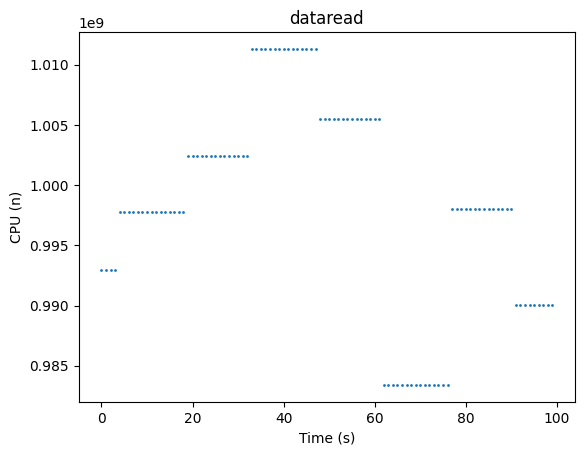

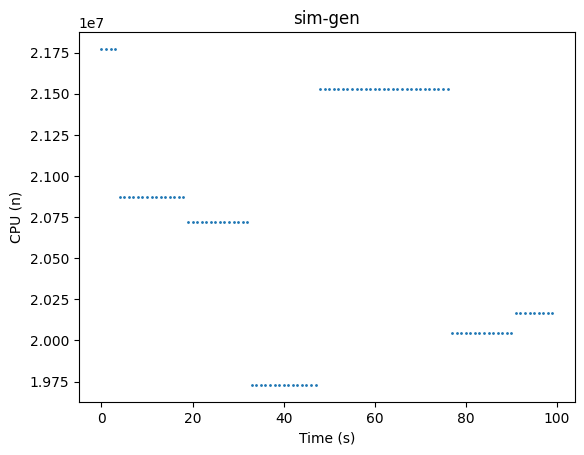

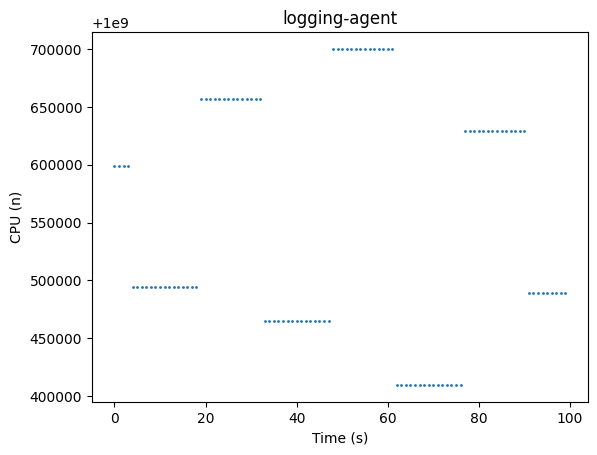

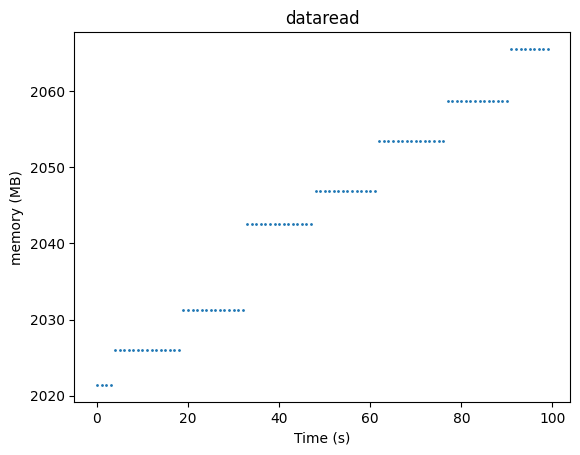

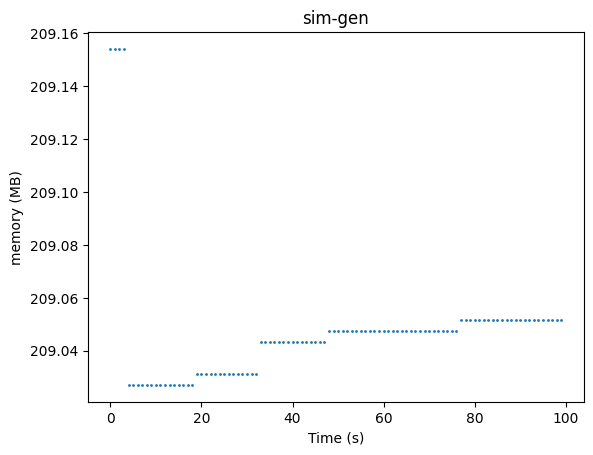

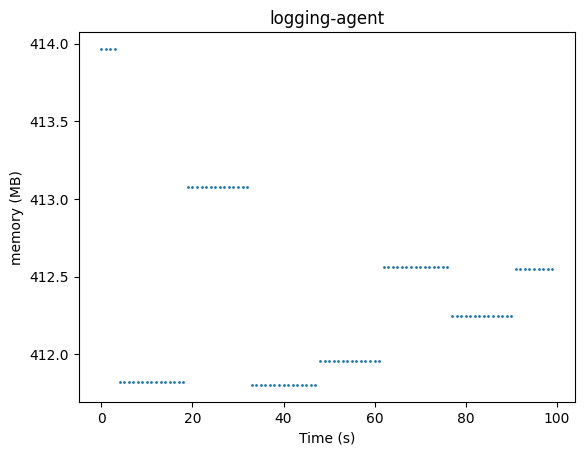

In [19]:
for container in df.container.unique():
    fig, ax = plt.subplots()
    cont_df = df[df.container == container]
    cont_df.reset_index(inplace=True)
    x = cont_df.index.values
    y = cont_df.cpu
    ax.title.set_text(container)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("CPU (n)")
    ax.scatter(x,y,s=1,zorder=1)

for container in df.container.unique():
    fig, ax = plt.subplots()
    cont_df = df[df.container == container]
    cont_df.reset_index(inplace=True)
    x = cont_df.index.values
    y = cont_df.memory
    ax.title.set_text(container)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("memory (MB)")
    ax.scatter(x,y,s=1,zorder=1)

In [82]:
!sshpass -p "lTLm#191" scp -r lucaserf@nodeserf2:/var/log/logging_data/ ./data/

#scp -r lucaserf@nodeserf2:/var/log/logging_data/ ./data/

In [83]:
df = pd.read_csv("data/logging_data/time.txt")


print(df.shape)


(2500, 10)


In [84]:
with open("data/logging_data/iperf.log") as f:
    lines = f.readlines()[6:]


df_iperf = pd.DataFrame([x.split() for x in lines])

In [33]:
df_iperf.tail()

,0,1,2,3,4,5,6,7
1533,[,5],1533.00-1534.00,sec,4.79,MBytes,40.1,Mbits/sec
1534,[,5],1534.00-1535.00,sec,4.82,MBytes,40.4,Mbits/sec
1535,[,5],1535.00-1536.00,sec,4.77,MBytes,40.0,Mbits/sec
1536,[,5],1536.00-1537.00,sec,4.75,MBytes,39.8,Mbits/sec
1537,[,5],1537.00-1538.00,sec,4.75,MBytes,39.8,Mbits/sec


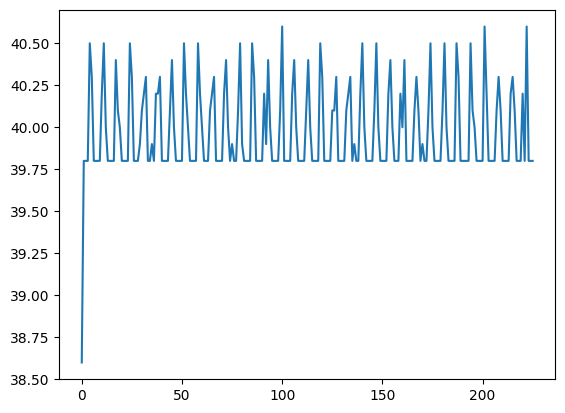

In [265]:

df_iperf[6].astype(float).plot()
plt.show()

In [108]:
df.head()

,id_node,id,type,log_creation_time,catch_time,after_preprocess_time,server_catch_time,completion_time,size,id_server
0,74bw6,1,anomaly,1.738928e+09,1.738928e+09,1.738928e+09,1.738928e+09,1.738928e+09,239,fgg76
1,74bw6,2,anomaly,1.738928e+09,1.738928e+09,1.738928e+09,1.738928e+09,1.738928e+09,239,t9p47
2,74bw6,3,anomaly,1.738928e+09,1.738928e+09,1.738928e+09,1.738928e+09,1.738928e+09,239,zxpg8
3,74bw6,4,anomaly,1.738928e+09,1.738928e+09,1.738928e+09,1.738928e+09,1.738928e+09,239,g82n2
4,74bw6,5,anomaly,1.738928e+09,1.738928e+09,1.738928e+09,1.738928e+09,1.738928e+09,239,4ts84


In [79]:
for id_server in df.id_server.unique():
    server_df = df[df.id_server == id_server]
    print(id_server)
    print(server_df.shape)

bkl8n
(2359, 10)


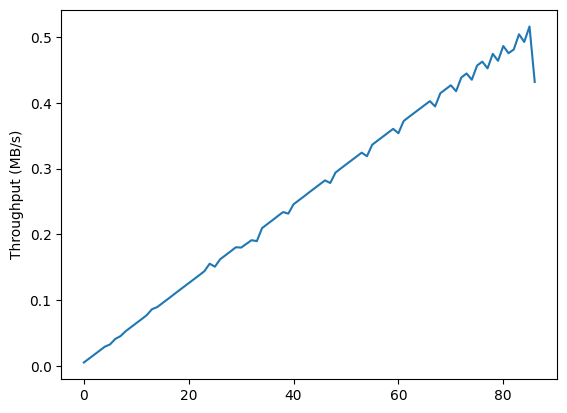

In [84]:
#get troughput
log_creation = df.log_creation_time - df.log_creation_time.min()

period = 1

log_creation = log_creation.apply(lambda x: int(x/period))

#sum size of logs per period
throughput = df.groupby(log_creation)["size"].sum()/10e6

#label y axis
plt.ylabel("Throughput (MB/s)")
plt.plot(throughput.values)

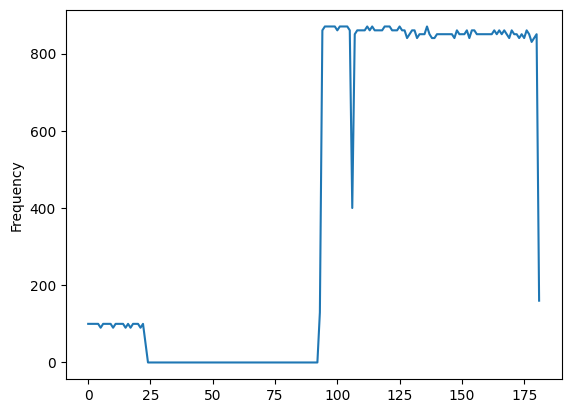

In [48]:
#get generation overall generation frequency
import numpy as np

batch = 10

# df = pd.read_csv(f"data/data_batching/{batch}_batch.txt")


log_creation = df.log_creation_time - df.log_creation_time.min()

period = 1

#get number of logs generated at each period
log_creation = log_creation.apply(lambda x: int(x/period))

#create an axis of frequency of logs generated
log_frequency = np.zeros(log_creation.max()+1)
for i in log_creation:
    log_frequency[i] += 1

log_frequency = log_frequency*batch

#make it monotonic increasing changing the decreasing values to the previous value
# for i in range(1,len(log_frequency)):
#     if log_frequency[i] < log_frequency[i-1]:
#         log_frequency[i] = log_frequency[i-1]

#get min and max values
# min_val = log_frequency.min()
# max_val = log_frequency.max()

# min_val_x = log_creation.min()
# max_val_x = log_creation.max()

# log_frequency = log_creation.apply(lambda x: (x-min_val_x)/(max_val_x-min_val_x)*(max_val-min_val)+min_val)

# log_frequency_t = []
# for i in range(len(log_creation)):
#     # get the closest value on log_frequency
#     log_frequency_t.append(log_frequency[log_creation[i]])

# log_frequency = np.array(log_frequency_t)




#label y axis
plt.ylabel("Frequency")
plt.plot(log_frequency)

# plt.hist(log_creation, bins=range(0,log_creation.max(),period))
# plt.title("Log creation frequency")
# plt.xlabel("Time (s)")
# plt.ylabel("Frequency")

plt.show()


<Axes: xlabel='type'>

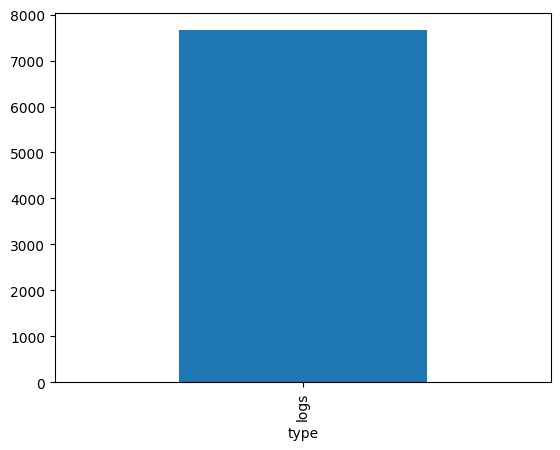

In [57]:
#counting type logs 

df["type"].value_counts().plot(kind='bar')

In [255]:
df.head()

,id_node,id,type,log_creation_time,catch_time,after_preprocess_time,server_catch_time,completion_time,size,id_server
0,zxvxh,1,anomaly,1.738943e+09,1.738943e+09,1.738943e+09,1.738943e+09,1.738943e+09,239,kbldv
1,zxvxh,2,anomaly,1.738943e+09,1.738943e+09,1.738943e+09,1.738943e+09,1.738943e+09,239,v8vlk
2,zxvxh,3,anomaly,1.738943e+09,1.738943e+09,1.738943e+09,1.738943e+09,1.738943e+09,239,5n2tr
3,zxvxh,4,anomaly,1.738943e+09,1.738943e+09,1.738943e+09,1.738943e+09,1.738943e+09,239,xsxmt
4,zxvxh,5,anomaly,1.738943e+09,1.738943e+09,1.738943e+09,1.738943e+09,1.738943e+09,239,pqq6l


In [109]:
df = pd.read_csv("data/data_traffic/logs_latency.txt")

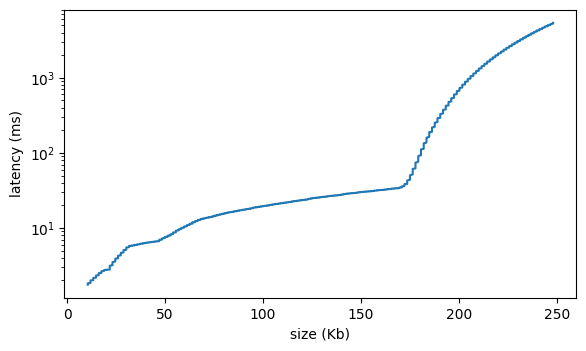

In [113]:
#get index and time for each id_node
#three colors 
colors = ["red","blue","green"]
types_logs = {"anomaly":0,"logs":1,"vectorized_logs":2}


# fig, ax = plt.subplots()
fig = plt.figure()

ax_main = fig.add_axes([0.1, 0.3, 0.8, 0.6])

for id_node in df.id_node.unique():
    node_df = df[df.id_node == id_node]

    # x = node_df.log_creation_time.values - node_df.log_creation_time.values[0]

    x = node_df["size"].values / 1024

    y = (node_df.server_catch_time - node_df.after_preprocess_time)*1000

    # y is after_preprocess_time - log_creation_time as long as log type is anomaly

    # anomaly_df = node_df[node_df.type == "anomaly"]
    # y_anomaly = (anomaly_df.after_preprocess_time - anomaly_df.log_creation_time)*1000  
    # rest_df = node_df[node_df.type != "anomaly"]
    # y_rest = (rest_df.completion_time - rest_df.log_creation_time)*1000
    # y = pd.concat([y_anomaly,y_rest])

    y_mean = y.rolling(window=100).mean()
    ax_main.plot(x,y_mean)

    # for type_log in types_logs.keys():
    #     type_df = node_df[node_df.type == type_log]
    #     x = type_df.log_creation_time.values - node_df.log_creation_time.values[0]
    #     y = (type_df.completion_time - type_df.server_catch_time)*1000 
    #     # ax.scatter(x,y,s=1,c=colors[types_logs[type_log]],label=type_log)
    #     y_mean = y.rolling(window=100).mean()
    #     ax.plot(x,y_mean)

    #draw a line where the log type changes

    for i in range(1,len(node_df)):
        if node_df.type.values[i] != node_df.type.values[i-1]:
            ax_main.axvline(x=node_df.log_creation_time.values[i] - node_df.log_creation_time.values[0],color="black")

    
plt.xlabel('Logs per second (logs/s)')
plt.ylabel('latency (ms)')

#change x axis to frequency of logs
plt.xlabel('size (Kb)')
# plt.xlim(80,170)

#add frequency of logs to a second plot under the x axis
# ax_freq = fig.add_axes([0.1, 0.1, 0.8, 0.2])
# ax_freq.plot(log_frequency)

# ax_freq.set_xlim(0,100)
# ax_main.set_xlim(0,100)


# plt.title(f'batch {batch}')

plt.yscale("log")

# plt.legend()

plt.show()

/tmp/ipykernel_2326488/875165539.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(x)}" for x in linear_function])


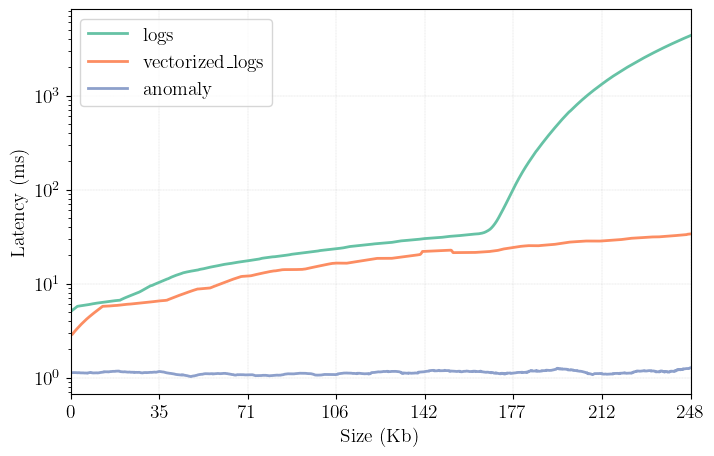

In [3]:
df_log_traffic = pd.read_csv("data/data_traffic/logs_latency.txt")
df_vec_traffic = pd.read_csv("data/data_traffic/vec_latency.txt")
df_anomaly_traffic = pd.read_csv("data/data_traffic/anomaly_latency.txt")

df_list = [df_log_traffic,df_vec_traffic,df_anomaly_traffic]
labels_list = ["logs","vectorized_logs","anomaly"]

fig, ax = plt.subplots()

sizes = df_log_traffic["size"].values / 1024

for i in range(len(df_list)):
    df_t = df_list[i]
    label = labels_list[i]

    #use times
    x = df_t.log_creation_time.values - df_t.log_creation_time.values[0]
    
    y = (df_t.server_catch_time - df_t.after_preprocess_time)*1000

    if label == "anomaly":
        y[y>4] = 1

    y = y.rolling(window=100).mean()
    ax.plot(x,y,label=label,linewidth=2.0)

plt.legend()

plt.xlim(10,80)
plt.yscale("log")
plt.ylabel("Latency (ms)")

max_size = sizes.max()
min_size = sizes.min()

#start from min and end with max
number_ticks = len(ax.get_xticks())
linear_function = np.linspace(min_size,max_size,number_ticks)
ax.set_xticklabels([f"{int(x)}" for x in linear_function])

plt.xlabel("Size (Kb)")

plt.legend(fontsize=14)
plt.rcParams["legend.fancybox"] = False
plt.grid(visible='true',color='grey', linestyle='dotted', linewidth=0.2)
plt.savefig("data/figure/latency_size.pdf",bbox_inches='tight')

/tmp/ipykernel_2326488/3695727629.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(x)}" for x in linear_function])


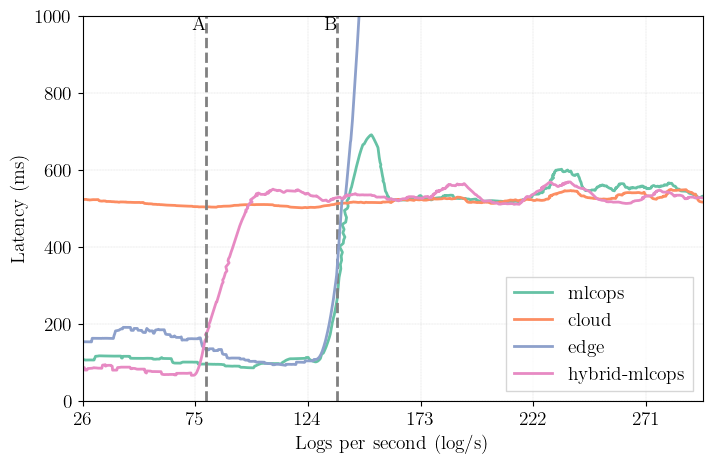

In [4]:
#get data from data_typecontrol

df_mixed = pd.read_csv("data/data_typecontrol/edge_cloud_mixed.txt")
df_cloud = pd.read_csv("data/data_typecontrol/cloud.txt")
df_edge = pd.read_csv("data/data_typecontrol/edge.txt")
df_hybrid = pd.read_csv("data/data_typecontrol/hybrid_mlkops.txt")
# df_hybrid = pd.read_csv("data/logging_data/time.txt")

labels = ["mlcops","cloud","edge","hybrid-mlcops"]


df_list = [df_mixed,df_cloud,df_edge,df_hybrid]
count = 0
fig, ax = plt.subplots()
plt.ylim(0,1000)
for i,df_type in enumerate(df_list):
    x = df_type.log_creation_time.values - df_type.log_creation_time.values[0]
    # y = (node_df.completion_time - node_df.log_creation_time)*1000
    
    # y is after_preprocess_time - log_creation_time as long as log type is anomaly
    anomaly_df = df_type[df_type.type == "anomaly"]
    y_anomaly = (anomaly_df.after_preprocess_time - anomaly_df.log_creation_time)*1000  
    rest_df = df_type[df_type.type != "anomaly"]
    y_rest = (rest_df.completion_time - rest_df.log_creation_time)*1000

    if labels[i] == "hybrid-mlcops":
        y_rest[y_rest > 600] = 600


    y = pd.concat([y_anomaly,y_rest])

    y_mean = y.rolling(window=100).mean()
    ax.plot(x,y_mean,label=labels[i], linewidth=2.0)

    
    for i in range(1,len(df_type)):
        letters = ["B","C","A"]
        # letters = ["A","B","C"]
        if df_type.type.values[i] != df_type.type.values[i-1]:
            if count != 1:
            # dotted line
            # ax.text(df_type.type.values[i], plt.ylim()[1],letters[count] , horizontalalignment='right', verticalalignment='top', fontsize=14, color='black')
                ax.axvline(x=df_type.log_creation_time.values[i] - df_type.log_creation_time.values[0], color='grey', linestyle='--', linewidth=2.0)
                #draw a letter on top of the line
                ax.text(df_type.log_creation_time.values[i] - df_type.log_creation_time.values[0], plt.ylim()[1],letters[count] , horizontalalignment='right', verticalalignment='top', fontsize=14, color='black')
            count += 1
            

#change x axis to frequency of logs by modifying the x axis numbers
plt.xlabel('Logs per second (log/s)')
plt.xlim(60,170)

min_freq = 80/3
max_freq = 320

#start from min and end with max
number_ticks = len(ax.get_xticks())
# ax.set_ticks(number_ticks)

linear_function = np.linspace(min_freq,max_freq,number_ticks)
ax.set_xticklabels([f"{int(x)}" for x in linear_function])

# plt.xlabel('Time (s)')
plt.ylabel('Latency (ms)')

plt.legend(fontsize=14, loc='lower right')
plt.rcParams["legend.fancybox"] = False
plt.grid(visible='true',color='grey', linestyle='dotted', linewidth=0.2)
plt.savefig("data/figure/mlcopsedgecloud.pdf",bbox_inches='tight')

    


/tmp/ipykernel_2326488/628163773.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(x)}" for x in linear_function])


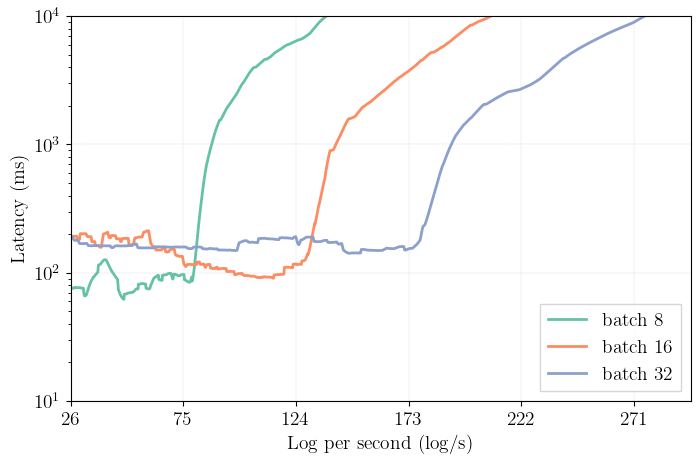

In [6]:

df_batch8 = pd.read_csv("data/data_batching/8_batch.txt")
df_batch16 = pd.read_csv("data/data_batching/16_batch.txt")
df_batch32 = pd.read_csv("data/data_batching/32_batch.txt")

df_list_batch = [df_batch8,df_batch16,df_batch32]
legend_batch = ["batch 8","batch 16","batch 32"]


fig, ax = plt.subplots()

for i,df_batch in enumerate(df_list_batch):

    x = df_batch.log_creation_time.values - df_batch.log_creation_time.values[0]
    y = (df_batch.after_preprocess_time - df_batch.log_creation_time)*1000

    # y is after_preprocess_time - log_creation_time as long as log type is anomaly

    # anomaly_df = node_df[node_df.type == "anomaly"]
    # y_anomaly = (anomaly_df.after_preprocess_time - anomaly_df.log_creation_time)*1000  
    # rest_df = node_df[node_df.type != "anomaly"]
    # y_rest = (rest_df.completion_time - rest_df.log_creation_time)*1000
    # y = pd.concat([y_anomaly,y_rest])

    y_mean = y.rolling(window=50).mean()
    ax.plot(x,y_mean,label=legend_batch[i],linewidth=2.0)

    # for type_log in types_logs.keys():
    #     type_df = node_df[node_df.type == type_log]
    #     x = type_df.log_creation_time.values - node_df.log_creation_time.values[0]
    #     y = (type_df.completion_time - type_df.server_catch_time)*1000 
    #     # ax.scatter(x,y,s=1,c=colors[types_logs[type_log]],label=type_log)
    #     y_mean = y.rolling(window=100).mean()
    #     ax.plot(x,y_mean)

    #draw a line where the log type changes

    # for i in range(1,len(node_df)):
    #     if node_df.type.values[i] != node_df.type.values[i-1]:
    #         ax.axvline(x=node_df.log_creation_time.values[i] - node_df.log_creation_time.values[0],color="black")



plt.ylabel('Latency (ms)')
plt.xlim(60,170)
plt.yscale("log")

#change x axis to frequency of logs
min_freq = 80/3
max_freq = 320
#start from min and end with max
number_ticks = len(ax.get_xticks())
linear_function = np.linspace(min_freq,max_freq,number_ticks)
ax.set_xticklabels([f"{int(x)}" for x in linear_function])

plt.xlabel('Log per second (log/s)')

plt.ylim(10,10000)

#add frequency of logs to a second plot under the x axis
# ax_freq = fig.add_axes([0.1, 0.1, 0.8, 0.2])
# ax_freq.plot(log_frequency)

plt.legend(fontsize=14, loc='lower right')
plt.rcParams["legend.fancybox"] = False
plt.grid(visible='true',color='grey', linestyle='dotted', linewidth=0.2)

plt.savefig("data/figure/latency_batching.pdf",bbox_inches='tight')


In [296]:
def concatenate_df(df_list_names):
    df_list = []
    for df_name in df_list_names:
        df = pd.read_csv("data/logging_data/"+df_name)
        df["parallelism"] = int(df_name.split("_")[1])
        df_list.append(df)
    min_len = min([df.shape[0]//df["parallelism"][0] for df in df_list])
    df = pd.concat([df[:min_len*df["parallelism"][0]] for df in df_list])
    return df
        

In [ ]:
df = concatenate_df(["time10log15.txt","time10vec15.txt"])
# df = concatenate_df(["time_log64_1.txt","time_vec64_1.txt","time_ano64_1.txt"])


fig, ax = plt.subplots()
for id_node in df.id_node.unique():
    node_df = df[df.id_node == id_node]
    x = node_df.log_creation_time.values - node_df.log_creation_time.values[0]
    # y = (node_df.server_catch_time.values - node_df.after_preprocess_time.values)*1000
    y = node_df["size"].values
    #eliminate outliers
    condition = y > 0
    x = x[condition]
    y = y[condition]
    ax.scatter(x,y,s=1,zorder=1,label=node_df.type.values[0])
    # print(np.mean(y))
    
plt.xlabel('creation time (s)')
plt.ylabel('time (ms)')
plt.legend()

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/logging_data/time10log15.txt'

In [95]:
df = concatenate_df(["time10log15.txt","time10vec15.txt"])
# df = concatenate_df(["time_log64_1.txt","time_vec64_1.txt","time_ano64_1.txt"])


fig, ax = plt.subplots()
for id_node in df.id_node.unique():
    node_df = df[df.id_node == id_node]
    gen_time = node_df.log_creation_time - node_df.log_creation_time[0]

    log_creation = gen_time.apply(lambda x: int(x/1))

    #sum size of logs per period
    throughput = node_df.groupby(log_creation)["size"].sum()

    # ax.scatter(x,y,s=1,zorder=1,label=node_df.type.values[0])
    plt.plot(throughput.values)
    
plt.xlabel('creation time (s)')
plt.ylabel('throughput (bytes/s)')

plt.show()

NameError: name 'concatenate_df' is not defined

In [530]:
df.head()

,id_node,id,type,log_creation_time,catch_time,after_preprocess_time,server_catch_time,completion_time,size,id_server,parallelism
0,6lnv2,1,logs,1.710253e+09,1.710253e+09,1.710253e+09,1.710253e+09,1.710253e+09,38093,xmvxj,5
1,lgbss,1,logs,1.710253e+09,1.710253e+09,1.710253e+09,1.710253e+09,1.710253e+09,38093,xmvxj,5
2,rj7jp,1,logs,1.710253e+09,1.710253e+09,1.710253e+09,1.710253e+09,1.710253e+09,38093,xmvxj,5
3,m2r7j,1,logs,1.710253e+09,1.710253e+09,1.710253e+09,1.710253e+09,1.710253e+09,38093,xmvxj,5
4,ngvft,1,logs,1.710253e+09,1.710253e+09,1.710253e+09,1.710253e+09,1.710253e+09,38093,xmvxj,5


101.0522582689921
103.03890647093455


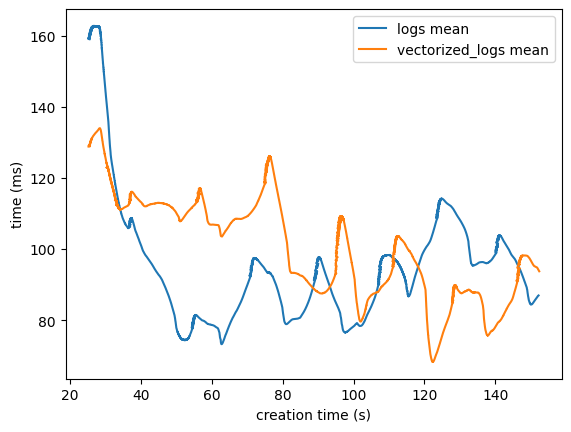

In [225]:
df = concatenate_df(["time_10_log_12_40.txt","time_10_vec_12_40.txt"])
# df = concatenate_df(["time_log64_1.txt","time_vec64_1.txt","time_ano64_1.txt"])


fig, ax = plt.subplots()
for type_log in df.type.unique():
    type_df = df[df.type == type_log]
    x = type_df.log_creation_time.values - type_df.log_creation_time.values[0]
    y = (type_df.server_catch_time - type_df.after_preprocess_time)*1000
    
    # y = type_df["size"].values
    #eliminate outliers
    # condition = y < 10
    # x = x[condition]
    # y = y[condition]
    y_mean = y.rolling(window=5000).mean()
    # ax.scatter(x,y,s=1,zorder=1,label=type_df.type.values[0])
    ax.plot(x,y_mean,label=type_df.type.values[0]+" mean")
    print(np.mean(y))
    
plt.xlabel('creation time (s)')
plt.ylabel('time (ms)')
plt.legend()

plt.show()

In [226]:
with open("data/logging_data/iperf_50_tcp_log.log") as f:
    lines = f.readlines()[6:]


df_iperf_log = pd.DataFrame([x.split() for x in lines])

with open("data/logging_data/iperf_50_tcp_vec.log") as f:
    lines = f.readlines()[6:]


df_iperf_vec = pd.DataFrame([x.split() for x in lines])

In [227]:
df_iperf_vec.head()

,0,1,2,3,4,5,6,7
0,[,5],0.00-1.00,sec,5.73,MBytes,48.1,Mbits/sec
1,[,5],1.00-2.00,sec,6.00,MBytes,50.3,Mbits/sec
2,[,5],2.00-3.00,sec,5.95,MBytes,49.9,Mbits/sec
3,[,5],3.00-4.00,sec,5.93,MBytes,49.7,Mbits/sec
4,[,5],4.00-5.00,sec,6.00,MBytes,50.3,Mbits/sec


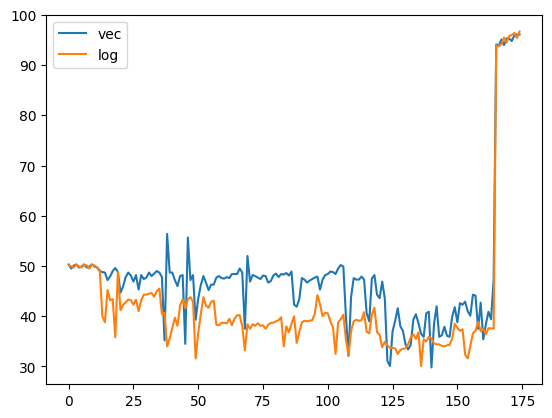

In [260]:
df_iperf_log_val = df_iperf_log[6][90:175+90].astype(float).reset_index(drop=True)


df_iperf_vec_val = df_iperf_vec[6][68:175+68].astype(float).reset_index(drop=True)


df_iperf_vec_val.plot(label="vec")
df_iperf_log_val.plot(label="log")
plt.legend()
plt.show()

36438.926
32600.790666666668


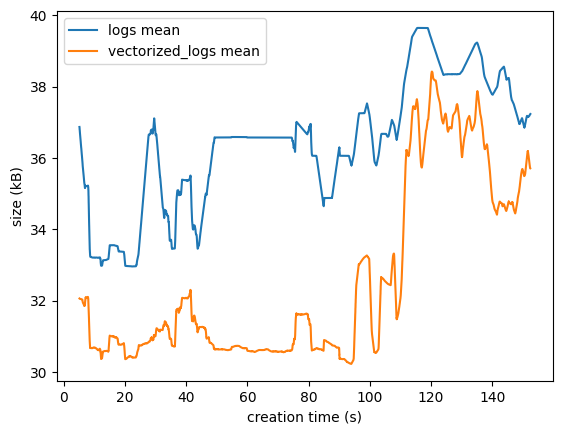

In [131]:
df = concatenate_df(["time_10_log12.txt","time_10_vec12.txt"])
# df = concatenate_df(["time_log64_1.txt","time_vec64_1.txt","time_ano64_1.txt"])


fig, ax = plt.subplots()
for type_log in df.type.unique():
    type_df = df[df.type == type_log]
    x = type_df.log_creation_time.values - type_df.log_creation_time.values[0]
    # y = (type_df.server_catch_time - type_df.after_preprocess_time)*1000
    
    y = type_df["size"]
    #eliminate outliers
    # condition = y < 10
    # x = x[condition]
    # y = y[condition]
    y_mean = y.rolling(window=1000).mean()/1e3
    # ax.scatter(x,y,s=1,zorder=1,label=type_df.type.values[0])
    ax.plot(x,y_mean,label=type_df.type.values[0]+" mean")
    print(np.mean(y))
    
plt.xlabel('creation time (s)')
plt.ylabel('size (kB)')
plt.legend()

plt.show()

In [146]:
df = pd.read_csv("data/logging_data/time_vec1.txt")
df.head()

,id_node,id,type,log_creation_time,catch_time,after_preprocess_time,server_catch_time,completion_time
0,269k7,1,vectorized_logs,1.706007e+09,1.706007e+09,1.706007e+09,1.706007e+09,1.706007e+09
1,269k7,2,vectorized_logs,1.706007e+09,1.706007e+09,1.706007e+09,1.706007e+09,1.706007e+09
2,269k7,3,vectorized_logs,1.706007e+09,1.706007e+09,1.706007e+09,1.706007e+09,1.706007e+09
3,269k7,4,vectorized_logs,1.706007e+09,1.706007e+09,1.706007e+09,1.706007e+09,1.706007e+09
4,269k7,5,vectorized_logs,1.706007e+09,1.706007e+09,1.706007e+09,1.706007e+09,1.706007e+09


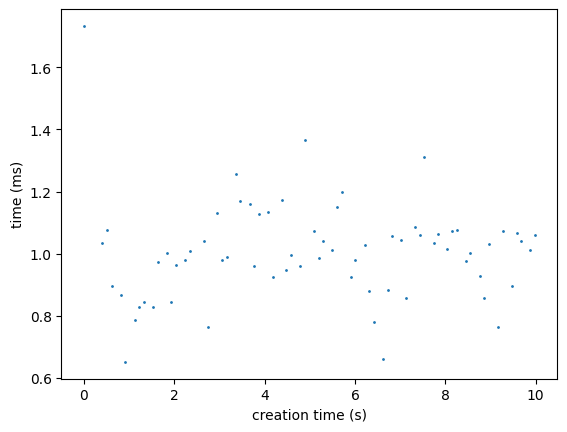

In [149]:
fig, ax = plt.subplots()
for id_node in df.id_node.unique():
    node_df = df[df.id_node == id_node][:100]
    x = node_df.log_creation_time.values - node_df.log_creation_time.values[0]
    y = (node_df.server_catch_time.values - node_df.after_preprocess_time.values)*1000 
    #eliminate outliers
    condition = y < 3
    x = x[condition]
    y = y[condition]
    ax.scatter(x,y,s=1,zorder=1)
    
plt.xlabel('creation time (s)')
plt.ylabel('time (ms)')

plt.show()

In [ ]:
fig, ax = plt.subplots()
for key in ["logs"]:
    ax.plot(data[key], label=key)
    plt.xlabel('logs')
    plt.ylabel('size [Bytes]')
    plt.legend()

plt.show()

for key in ["mean_padding"]:
    fig, ax = plt.subplots()
    plt.xlabel('steps')
    plt.ylabel(key)
    ax.plot(data[key])
    plt.show()

In [ ]:
for key in data.keys():
    fig, ax = plt.subplots()
    plt.xlabel('steps')
    plt.ylabel(key)
    ax.plot(data[key])
    plt.show()
        # fig.savefig("")

In [9]:
#testing encoding and decoding
vocab_size = 4000
max_len=60
latent_dim = max_len//2

chkpt = "data_visualization/logging_data/logs_model/"

raw_ds = ( #.filter(lambda x: tf.strings.length(x) > MIN_TRAINING_SEQ_LEN)
    tf.data.TextLineDataset("persistent_volume/data/HDFS_v2/node_logs/hadoop-hdfs-datanode-mesos-01.log")
    .batch(1)
    .shuffle(buffer_size=256)
)

with open("docker_agent_logger/app/logs_tokenizer/vocab.pkl","rb") as f:
    vocab = pickle.load(f)

tokenizer = Tokenizer(vocab=vocab,max_len=max_len)

ds = raw_ds.map(tokenizer.preprocess, num_parallel_calls=tf.data.AUTOTUNE).prefetch(
    tf.data.AUTOTUNE
)

model = Model(vocab_size = vocab_size,latent_dim=latent_dim,embedding_dim=128,max_len = max_len)

model.vae.load_model(chkpt=chkpt)


# z = tf.random.normal(shape=(1, latent_dim))
# vectorized_token = ds.shuffle(buffer_size=256).take(1).as_numpy_iterator().next()

# print(tokenizer.decode(vectorized_token))

# z = model.vae.encode(vectorized_token)

# print(z)

# tokens = model.vae.decode(z)

# print(tokenizer.decode(tokens))



2023-11-14 15:24:32.273141: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-14 15:24:32.520119: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-14 15:24:32.520305: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-14 15:24:32.529282: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-14 15:24:32.529400: I tensorflow/compile

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_word_ids (InputLayer  [(None, 60)]                 0         []                            
 )                                                                                                
                                                                                                  
 input_embedding (TokenAndP  (None, 60, 128)              519680    ['input_word_ids[0][0]']      
 ositionEmbedding)                                                                                
                                                                                                  
 encoding (TransformerEncod  (None, 60, 128)              71828     ['input_embedding[0][0]']     
 er)                                                                                        

2023-11-14 15:25:03.546239: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


100000/100000 [==============================] - 2758s 27ms/step


2023-11-14 16:10:58.230430: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 13504693080879762698


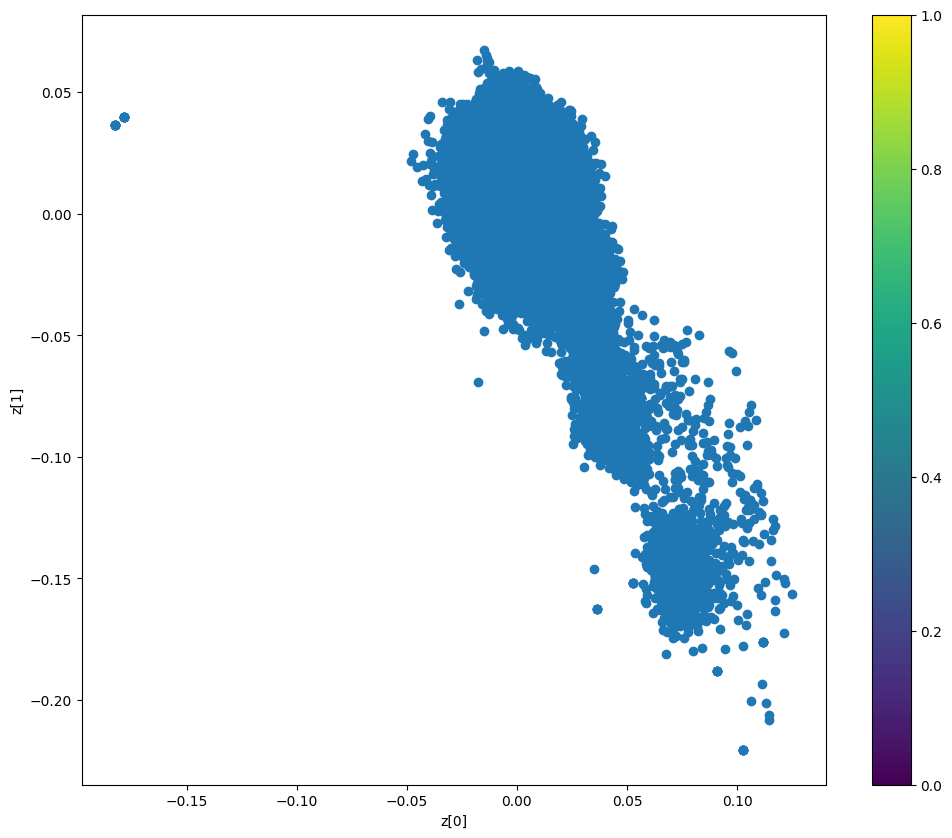

In [10]:
def plot_label_clusters(vae, name,data):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1])
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.savefig("./results/"+name+".png")
    plt.show()

# model = Model(vocab_size = vocab_size,latent_dim=latent_dim,embedding_dim=128,max_len = max_len)

# model.vae.load_model(chkpt=chkpt)
plot_label_clusters(model.vae, "cluster",ds.take(100000))


# for i in range(32):
#     model.vae.load_model(chkpt=chkpt+str(i))

#     plot_label_clusters(model.vae, "cluster"+str(i),ds)

In [49]:
raw_ds = ( #.filter(lambda x: tf.strings.length(x) > MIN_TRAINING_SEQ_LEN)
    tf.data.TextLineDataset("persistent_volume/data/HDFS_v2/node_logs/hadoop-hdfs-datanode-mesos-01.log")
    .batch(64)
)

print(raw_ds.take(1).as_numpy_iterator().next())

[b'2015-12-03 14:37:47,611 INFO org.apache.hadoop.hdfs.server.datanode.DataNode: STARTUP_MSG: '
 b'/************************************************************'
 b'STARTUP_MSG: Starting DataNode'
 b'STARTUP_MSG:   host = mesos-master-1/10.10.34.11'
 b'STARTUP_MSG:   args = []' b'STARTUP_MSG:   version = 2.7.1'
 b'STARTUP_MSG:   classpath = /usr/local/hadoop/etc/hadoop:/usr/local/hadoop/share/hadoop/common/lib/commons-digester-1.8.jar:/usr/local/hadoop/share/hadoop/common/lib/activation-1.1.jar:/usr/local/hadoop/share/hadoop/common/lib/commons-configuration-1.6.jar:/usr/local/hadoop/share/hadoop/common/lib/commons-math3-3.1.1.jar:/usr/local/hadoop/share/hadoop/common/lib/api-util-1.0.0-M20.jar:/usr/local/hadoop/share/hadoop/common/lib/hamcrest-core-1.3.jar:/usr/local/hadoop/share/hadoop/common/lib/jaxb-api-2.2.2.jar:/usr/local/hadoop/share/hadoop/common/lib/slf4j-api-1.7.10.jar:/usr/local/hadoop/share/hadoop/common/lib/jetty-util-6.1.26.jar:/usr/local/hadoop/share/hadoop/common/lib/jer